In [2]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact
from keras.datasets import mnist
from keras.utils import np_utils

Using TensorFlow backend.


# 資料整理

In [12]:
#讀取數據
(x_train,y_train),(x_test,y_test)=mnist.load_data()

#更改資料格式
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)

#將數據歸一化
x_train=x_train/x_train.max()
x_test=x_test/x_test.max()

y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)

# 建立神經網路

In [24]:
from keras.layers import concatenate, add
from keras.models import Model
from keras.layers import Input
from keras import optimizers
from keras import losses

# model_1 : All sigmoid

In [43]:
# 1st hiddden layer
f_1 = Dense(784, activation='sigmoid')

#此處做一次分枝
# 2-1 hiddden layer
f_2 = Dense(392, activation='sigmoid')
f_3 = Dense(392, activation='sigmoid')

# output端
f_4 = Dense(10, activation='softmax')

# input端
x = Input(shape=(784,))

h_1 = f_1(x)
h_2_1 = f_2(h_1)
h_2_2 = f_3(h_1)

#將兩分枝匯集
u=concatenate([h_2_1,h_2_2])

y = f_4(u)

model_1 = Model(x, y)

Adm=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, 
                epsilon=None, decay=0.0, amsgrad=False)

model_1.compile(loss=losses.categorical_crossentropy,
              optimizer=Adm,metrics=['accuracy'])

model_1_train=model_1.fit(x_train,y_train,batch_size=100,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 44s 734us/step - loss: 0.4284 - acc: 0.8710
Epoch 2/10
60000/60000 [==============================] - 42s 705us/step - loss: 0.1980 - acc: 0.9408
Epoch 3/10
60000/60000 [==============================] - 48s 805us/step - loss: 0.1357 - acc: 0.9593
Epoch 4/10
60000/60000 [==============================] - 41s 677us/step - loss: 0.0987 - acc: 0.9702
Epoch 5/10
60000/60000 [==============================] - 43s 709us/step - loss: 0.0756 - acc: 0.9772
Epoch 6/10
60000/60000 [==============================] - 44s 729us/step - loss: 0.0585 - acc: 0.9817
Epoch 7/10
60000/60000 [==============================] - 44s 730us/step - loss: 0.0456 - acc: 0.9858
Epoch 8/10
60000/60000 [==============================] - 43s 714us/step - loss: 0.0355 - acc: 0.9889
Epoch 9/10
60000/60000 [==============================] - 43s 715us/step - loss: 0.0307 - acc: 0.9896
Epoch 10/10
60000/60000 [==============================] - 45s 745us/step - loss: 

# Model_2：half simoid and half relu

In [45]:
# 1st hiddden layer
f_1 = Dense(784, activation='sigmoid')

#此處做一次分枝
# 2-1 hiddden layer
f_2 = Dense(392, activation='sigmoid')
f_3 = Dense(392, activation='relu')

# output端
f_4 = Dense(10, activation='softmax')

# input端
x = Input(shape=(784,))

h_1 = f_1(x)
h_2_1 = f_2(h_1)
h_2_2 = f_3(h_1)

#將兩分枝匯集
u=concatenate([h_2_1,h_2_2])

y = f_4(u)

model_2 = Model(x, y)

Adm=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, 
                epsilon=None, decay=0.0, amsgrad=False)

model_2.compile(loss=losses.categorical_crossentropy,
              optimizer=Adm,metrics=['accuracy'])

model_2_train=model_2.fit(x_train,y_train,batch_size=100,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 42s 706us/step - loss: 0.4179 - acc: 0.8767
Epoch 2/10
60000/60000 [==============================] - 41s 687us/step - loss: 0.1955 - acc: 0.9414
Epoch 3/10
60000/60000 [==============================] - 42s 700us/step - loss: 0.1312 - acc: 0.9600
Epoch 4/10
60000/60000 [==============================] - 42s 703us/step - loss: 0.0954 - acc: 0.9705
Epoch 5/10
60000/60000 [==============================] - 42s 708us/step - loss: 0.0731 - acc: 0.9775
Epoch 6/10
60000/60000 [==============================] - 43s 714us/step - loss: 0.0575 - acc: 0.9818
Epoch 7/10
60000/60000 [==============================] - 44s 728us/step - loss: 0.0445 - acc: 0.9855
Epoch 8/10
60000/60000 [==============================] - 43s 710us/step - loss: 0.0353 - acc: 0.9887
Epoch 9/10
60000/60000 [==============================] - 43s 709us/step - loss: 0.0292 - acc: 0.9901
Epoch 10/10
60000/60000 [==============================] - 43s 716us/step - loss: 

# Model_3 : All relu

In [46]:
# 1st hiddden layer
f_1 = Dense(784, activation='sigmoid')

#此處做一次分枝
# 2-1 hiddden layer
f_2 = Dense(392, activation='relu')
f_3 = Dense(392, activation='relu')

# output端
f_4 = Dense(10, activation='softmax')

# input端
x = Input(shape=(784,))

h_1 = f_1(x)
h_2_1 = f_2(h_1)
h_2_2 = f_3(h_1)

#將兩分枝匯集
u=concatenate([h_2_1,h_2_2])

y = f_4(u)

model_3 = Model(x, y)

Adm=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, 
                epsilon=None, decay=0.0, amsgrad=False)

model_3.compile(loss=losses.categorical_crossentropy,
              optimizer=Adm,metrics=['accuracy'])

model_3_train=model_3.fit(x_train,y_train,batch_size=100,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 43s 716us/step - loss: 0.4015 - acc: 0.8782
Epoch 2/10
60000/60000 [==============================] - 42s 699us/step - loss: 0.1856 - acc: 0.9439
Epoch 3/10
60000/60000 [==============================] - 42s 699us/step - loss: 0.1262 - acc: 0.9618
Epoch 4/10
60000/60000 [==============================] - 43s 716us/step - loss: 0.0936 - acc: 0.9718
Epoch 5/10
60000/60000 [==============================] - 42s 708us/step - loss: 0.0721 - acc: 0.9774
Epoch 6/10
60000/60000 [==============================] - 43s 713us/step - loss: 0.0548 - acc: 0.9823
Epoch 7/10
60000/60000 [==============================] - 44s 727us/step - loss: 0.0436 - acc: 0.9858
Epoch 8/10
60000/60000 [==============================] - 42s 706us/step - loss: 0.0340 - acc: 0.9891
Epoch 9/10
60000/60000 [==============================] - 42s 708us/step - loss: 0.0269 - acc: 0.9908
Epoch 10/10
60000/60000 [==============================] - 43s 714us/step - loss: 

# 比較三種模型的訓練狀況

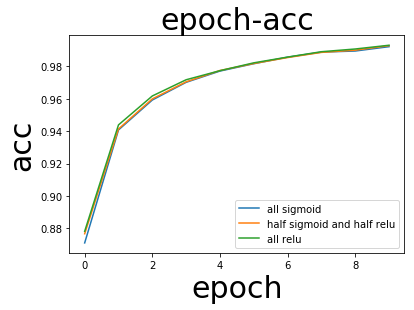

In [48]:
plt.plot(model_1_train.history["acc"], label='all sigmoid')
plt.plot(model_2_train.history["acc"], label='half sigmoid and half relu')
plt.plot(model_3_train.history["acc"], label='all relu')
plt.legend(loc='best')
plt.xlabel('epoch',size=30)
plt.ylabel('acc',size=30)
plt.title('epoch-acc',size=30)
plt.show()

In [50]:
score_1=model_1.evaluate(x_test,y_test)
score_2=model_2.evaluate(x_test,y_test)
score_3=model_3.evaluate(x_test,y_test)

print('all sigmoid,acc:',score_1[1])
print('half sigmoid,acc:',score_2[1])
print('all relu,acc:',score_3[1])

10000/10000 [==============================] - 3s 260us/step
all sigmoid,acc: 0.9782
half sigmoid,acc: 0.9801
all relu,acc: 0.9784


# 結論 :

## 在此一結構之神經網路中，分支方法對訓練結果影響不大